In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'archive/KDDTrain+.txt')

In [3]:
data.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [4]:
column_names = [
  'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
  'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
  'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root',
  'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
  'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
  'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
  'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
  'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
  'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate',
  'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type', 'difficulty_level'
]

# Rename columns for both dataframes
data.columns = column_names

In [5]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,difficulty_level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [6]:
data.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,difficulty_level
125967,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.0,1.00,1.0,0.00,0.0,neptune,20
125968,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.0,0.00,0.0,0.00,0.0,normal,21
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.0,0.72,0.0,0.01,0.0,normal,18
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.0,1.00,1.0,0.00,0.0,neptune,20
125971,0,tcp,ftp_data,SF,151,0,0,0,0,0,...,0.30,0.03,0.30,0.0,0.00,0.0,0.00,0.0,normal,21


In [7]:
data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [8]:
data.shape

(125972, 43)

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125972.0,287.146929,2.604526e+03,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,125972.0,45567.100824,5.870354e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125972.0,19779.271433,4.021285e+06,0.0,0.00,0.00,516.00,1.309937e+09
land,125972.0,0.000198,1.408613e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125972.0,0.022688,2.535310e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125972.0,0.000111,1.436608e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,125972.0,0.204411,2.149977e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125972.0,0.001222,4.523932e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,125972.0,0.395739,4.890107e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,125972.0,0.279253,2.394214e+01,0.0,0.00,0.00,0.00,7.479000e+03


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [11]:
data.select_dtypes('object')

,protocol_type,service,flag,attack_type
0,udp,other,SF,normal
1,tcp,private,S0,neptune
2,tcp,http,SF,normal
3,tcp,http,SF,normal
4,tcp,private,REJ,neptune
...,...,...,...,...
125967,tcp,private,S0,neptune
125968,udp,private,SF,normal
125969,tcp,smtp,SF,normal
125970,tcp,klogin,S0,neptune


In [12]:
data.value_counts('protocol_type')

protocol_type
tcp     102688
udp      14993
icmp      8291
Name: count, dtype: int64

In [13]:
data.value_counts('service')


service
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6859
             ...  
tftp_u           3
http_8001        2
harvest          2
aol              2
http_2784        1
Name: count, Length: 70, dtype: int64

In [14]:
data.value_counts('flag')

flag
SF        74944
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: count, dtype: int64

In [15]:
data.value_counts('attack_type')

attack_type
normal             67342
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Attack Types')

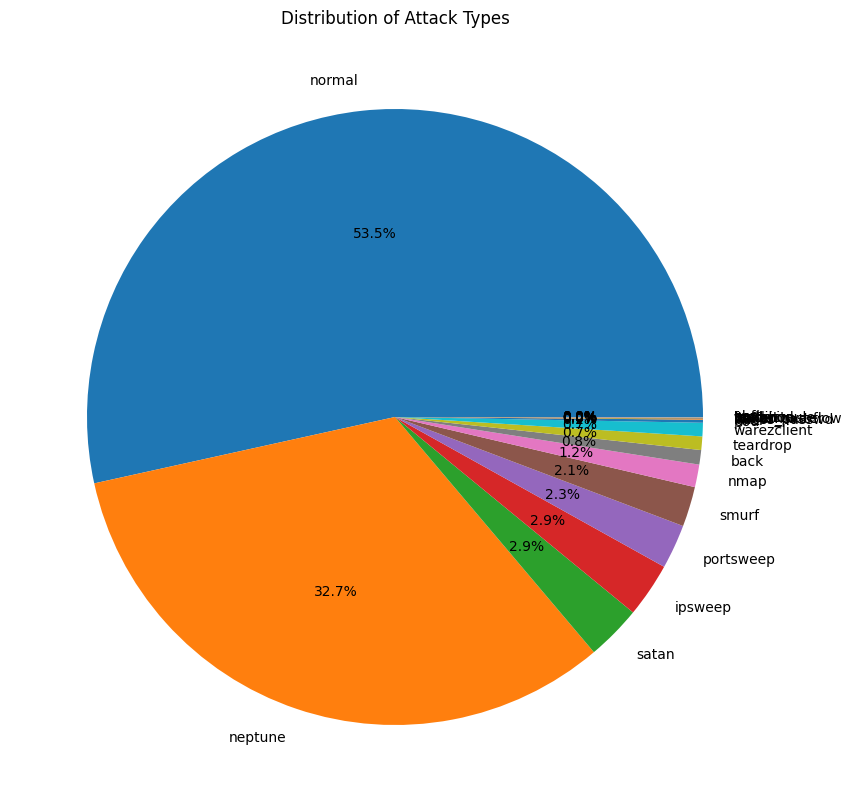

In [17]:
# Distribution of attack types
attack_counts = data['attack_type'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(attack_counts.values, labels=attack_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Attack Types')

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from collections import Counter

# Make a copy
df = data.copy()

# Encode categorical columns
cat_cols = ['protocol_type', 'service', 'flag']
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Encode the target
le_target = LabelEncoder()
df['attack_type'] = le_target.fit_transform(df['attack_type'])

# Prepare features and target
X = df.drop(['attack_type', 'difficulty_level'], axis=1)
y = df['attack_type']

In [42]:
# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Split the data into indices for train and test
train_index, test_index = next(skf.split(X, y))

# Create the training and test sets
X_train, X_test = X.iloc[train_index], X.iloc[test_index]
y_train, y_test = y.iloc[train_index], y.iloc[test_index]

c:\Users\ishan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


In [43]:
# Filter classes with at least 2 samples (SMOTE requirement)
value_counts = y_train.value_counts()
valid_classes = value_counts[value_counts >= 2].index
mask = y_train.isin(valid_classes)
X_train_filtered = X_train[mask]
y_train_filtered = y_train[mask]

# Apply SMOTE
smt = SMOTETomek(smote=SMOTE(k_neighbors=1, random_state=42), random_state=42)
X_resampled, y_resampled = smt.fit_resample(X_train_filtered, y_train_filtered)


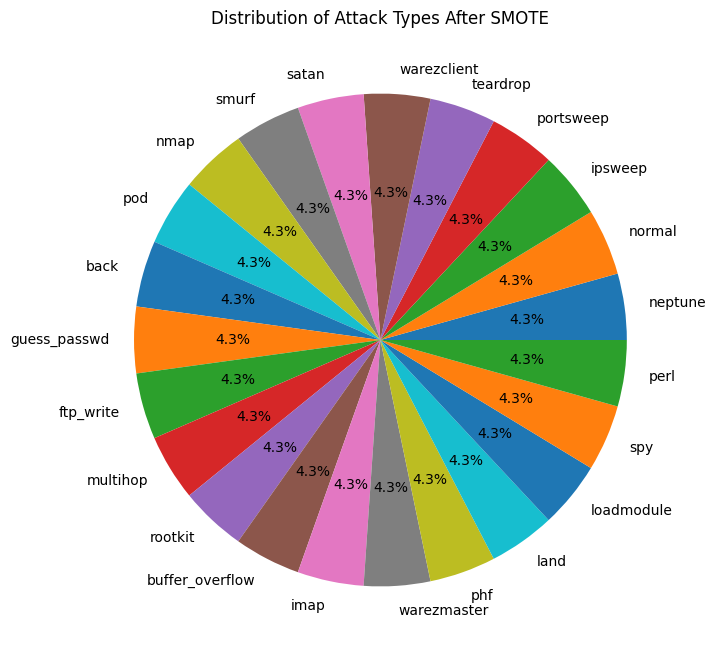

In [44]:
from matplotlib import pyplot as plt
from collections import Counter

# Use y_resampled from SMOTE (already label-encoded)
resampled_counts = Counter(y_resampled)

# Reverse the encoding to show original labels
resampled_labels = le_target.inverse_transform(list(resampled_counts.keys()))
resampled_values = list(resampled_counts.values())

# Plot balanced distribution
plt.figure(figsize=(8, 8))
plt.pie(resampled_values, labels=resampled_labels, autopct='%1.1f%%')
plt.title('Distribution of Attack Types After SMOTE')
plt.show()


In [53]:
attack_categories = {
    'DOS': ['neptune', 'back', 'smurf', 'pod', 'teardrop', 'land', 'apache2', 'udpstorm', 'processtable', 'mailbomb'],
    'Probe': ['ipsweep', 'nmap', 'portsweep', 'satan', 'mscan', 'saint'],
    'R2L': ['guess_passwd', 'ftp_write', 'imap', 'phf', 'multihop', 'warezmaster', 'xsnoop', 'httptunnel', 'snmpguess', 'snmpgetattack', 'sendmail'],
    'U2R': ['buffer_overflow', 'loadmodule', 'rootkit', 'perl', 'sqlattack', 'xterm', 'ps'],
    'Normal': ['normal']
}

# Flatten the mapping
attack_mapping = {}
for category, names in attack_categories.items():
    for name in names:
        attack_mapping[name] = category


In [54]:
# Make sure you're working with a fresh copy of the original dataset
df = data.copy()

# Add a new column 'attack_category' using the mapping
df['attack_category'] = df['attack_type'].map(attack_mapping)

# Drop rows where attack_category is NaN (i.e., removed rare attack types)
df = df[df['attack_category'].notna()]


In [55]:
# Encode categorical features
cat_cols = ['protocol_type', 'service', 'flag']
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Encode the target category
le_cat = LabelEncoder()
df['attack_category_encoded'] = le_cat.fit_transform(df['attack_category'])

# Prepare features and labels
X = df.drop(['attack_type', 'difficulty_level', 'attack_category', 'attack_category_encoded'], axis=1)
y = df['attack_category_encoded']


In [ ]:
from sklearn.model_selection import StratifiedKFold

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store metrics
fold_accuracy = []
fold_reports = []

# Perform k-fold cross validation
for fold, (train_idx, val_idx) in enumerate(skf.split(X_resampled, y_resampled), 1):
  # Split the data
  X_fold_train = X_resampled.iloc[train_idx]
  X_fold_val = X_resampled.iloc[val_idx]
  y_fold_train = y_resampled.iloc[train_idx]
  y_fold_val = y_resampled.iloc[val_idx]

In [57]:
value_counts = y_train.value_counts()
valid_classes = value_counts[value_counts >= 2].index
mask = y_train.isin(valid_classes)

X_train_filtered = X_train[mask]
y_train_filtered = y_train[mask]

smt = SMOTETomek(smote=SMOTE(k_neighbors=1, random_state=42), random_state=42)
X_resampled, y_resampled = smt.fit_resample(X_train_filtered, y_train_filtered)


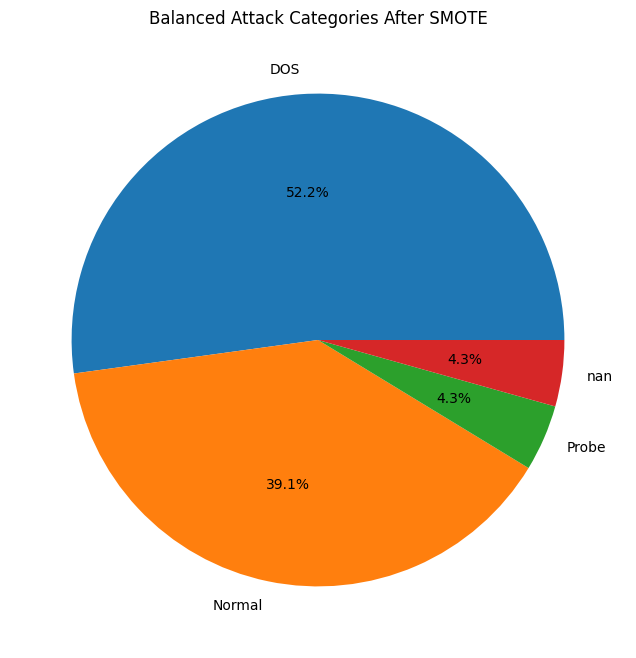

In [59]:
from collections import Counter

# Map the attack types to categories first
df_temp = pd.DataFrame({'attack_type': y_resampled})
df_temp['attack_category'] = df_temp['attack_type'].map(data['attack_type'].map(attack_mapping))

resampled_counts = Counter(df_temp['attack_category'])
resampled_values = list(resampled_counts.values())
resampled_labels = list(resampled_counts.keys())

plt.figure(figsize=(8, 8))
plt.pie(resampled_values, labels=resampled_labels, autopct='%1.1f%%')
plt.title('Balanced Attack Categories After SMOTE')
plt.show()


In [60]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create and train the GBM classifier
gbm = GradientBoostingClassifier(
    n_estimators=100,         # try 50–150
    learning_rate=0.05,       # lower for smoother fit
    max_depth=3,              # small trees generalize better
    min_samples_split=4,
    min_samples_leaf=2,
    subsample=0.8,            # stochastic boosting
    random_state=42
)

# Fit the model on the SMOTE-balanced training data
gbm.fit(X_resampled, y_resampled)

# Make predictions on test set
y_pred = gbm.predict(X_test)

# Print the classification report

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le_cat.classes_))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
      xticklabels=le_cat.classes_,
      yticklabels=le_cat.classes_)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print(f"\nAccuracy: {accuracy:.4f}")

KeyboardInterrupt: 

In [ ]:
test_data = pd.read_csv(r'archive/KDDTest+.txt')


In [ ]:
test_data.columns = column_names
test_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,difficulty_level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.94      0.77      0.85      7457
           1       0.68      0.96      0.80      9711
           2       0.74      0.70      0.72      2421
           3       0.74      0.07      0.13      2859
           4       0.21      0.30      0.25        67

    accuracy                           0.76     22515
   macro avg       0.66      0.56      0.55     22515
weighted avg       0.78      0.76      0.72     22515



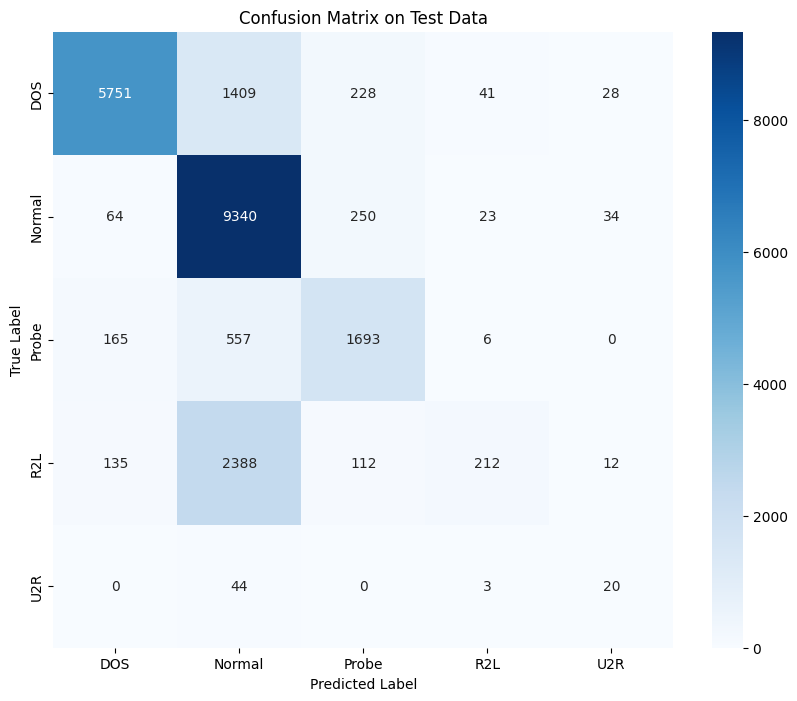


Test Accuracy: 0.7558


In [ ]:
# Make a copy of test data
test_df = test_data.copy()

# Encode categorical columns with the same encoders used for training
cat_cols = ['protocol_type', 'service', 'flag']
for col in cat_cols:
  le = LabelEncoder()
  test_df[col] = le.fit_transform(test_df[col])

# Add attack category mapping
test_df['attack_category'] = test_df['attack_type'].map(attack_mapping)

# Drop rows where attack_category is NaN (i.e., removed rare attack types)
test_df = test_df[test_df['attack_category'].notna()]

# Prepare features (same as training)
X_test_final = test_df.drop(['attack_type', 'difficulty_level', 'attack_category'], axis=1)

# Make predictions
test_predictions = gbm.predict(X_test_final)

# Convert predictions back to category labels
test_predictions_labels = le_cat.inverse_transform(test_predictions)

# Print classification report
print("Classification Report on Test Data:")
print(classification_report(le_cat.transform(test_df['attack_category']), test_predictions))

# Create confusion matrix
cm = confusion_matrix(le_cat.transform(test_df['attack_category']), test_predictions)

# Plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
      xticklabels=le_cat.classes_,
      yticklabels=le_cat.classes_)
plt.title('Confusion Matrix on Test Data')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Calculate accuracy
accuracy = np.mean(test_predictions == le_cat.transform(test_df['attack_category']))
print(f"\nTest Accuracy: {accuracy:.4f}")

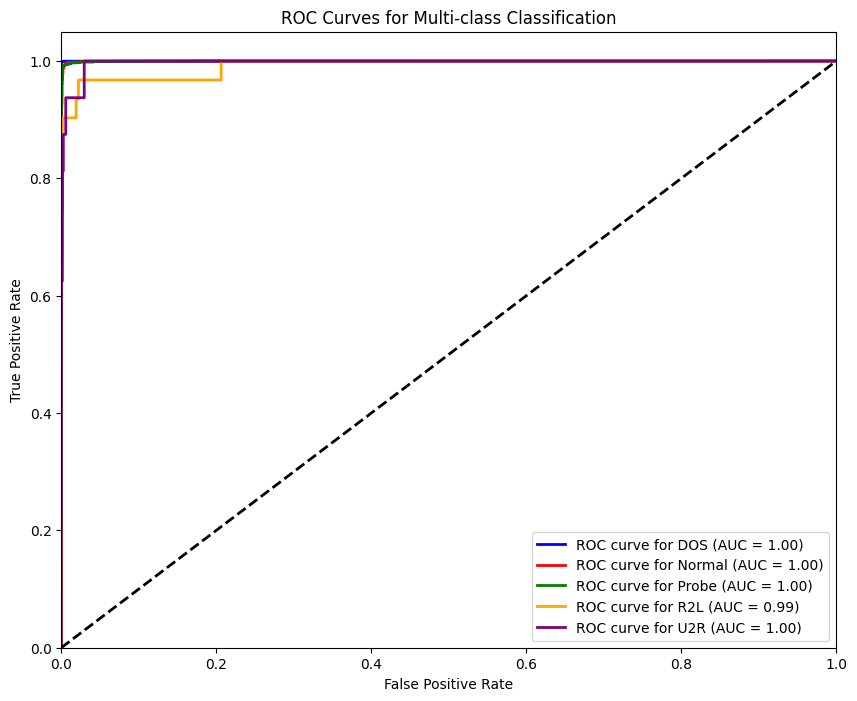

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

import matplotlib.pyplot as plt

# Get probability predictions
y_pred_proba = gbm.predict_proba(X_test)

# Binarize the test labels for ROC curve
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Calculate ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = len(np.unique(y_test))
for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'orange', 'purple']
labels = le_cat.classes_

for i, color, label in zip(range(n_classes), colors, labels):
  plt.plot(fpr[i], tpr[i], color=color, lw=2,
       label=f'ROC curve for {label} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multi-class Classification')
plt.legend(loc="lower right")
plt.show()